<a href="https://colab.research.google.com/github/bibs2091/solve-equation-with-genetic-algorithm/blob/master/GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary libreries 

In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt


define the *fitness* function and *fitness to probability* function

In [0]:
def fitness(matrix):
  cof = np.array([1,2,3,4])
  res = np.sum(cof * matrix,axis=1,keepdims=True)
  return np.absolute(res - 30)
  
def fitprob(matrix):
  res = fitness(matrix)
  summ =  np.sum(res,keepdims=True)
  return   1 - (res / summ)

This function do a crossover between random number of chromosomes 

In [0]:
def round_up_to_even(f):
  return math.ceil(f / 2.) * 2
def crossover(matrix):
  shape0 = matrix.shape[0]
  shape1 = matrix.shape[1]
  nb_cross = round_up_to_even(shape0)
  to_cross = np.random.randint(0,shape0,(nb_cross,2))
  crossed = np.array([np.concatenate((matrix[ind[0],:2],matrix[ind[1],2:])) for ind in to_cross])
  matrix = np.append(matrix, crossed, axis=0)
  return matrix

This function do a mutation in random gen in random chromosomes 

In [0]:
def mutation(matrix):
  probability = 0.2
  shape0 = matrix.shape[0]
  shape1 = matrix.shape[1]
  p_mutate = (np.random.uniform(size=(shape0,1)) <= probability)
  for i in range(shape0):
    if (p_mutate[i] == True):
      random_num = np.random.randint(0,30)
      random_col = np.random.randint(0,shape1)
      matrix[i,random_col] = random_num
  return matrix

Selecting chromosomes based on their fitprob, if it's low then there's a high chance that It will drop

In [0]:

def select(matrix,vector):
  shape0 = matrix.shape[0]
  drop_prob = ( np.random.uniform(size=(shape0,1)) <= vector)
  matrix = np.array([matrix[i,:] for i in range(shape0) if drop_prob[i]])
  return matrix

Selecting basing on ranking them then take the top half among them 

In [0]:
# def select(matrix,vector):
#   new_v = np.array([[vector[i].tolist(),i] for i in range(vector.shape[0])])
#   r = new_v[new_v[:,0].argsort()[::-1]]
#   res = r[:int(vector.shape[0]//2)]
#   new_pop = np.array([matrix[i] for i in res[:,1]])
#   return new_pop
# select(population,vector)

Now the function to train our population over certain number of generations

In [0]:
def train(generation = 10):
  population = np.random.randint(0,30,(10,4))
  fitness_list = [min(fitness(population))]
  for i in range(generation):
    population = crossover(population)
    population = mutation(population)
    vector = fitprob(population)
    fitness_list.append(min(fitness(population)))
    population = select(population,vector)
  index_of_solution = np.argmin(fitness(population))
  return population,fitness_list,population[index_of_solution]


now let's plot the fitness over generations

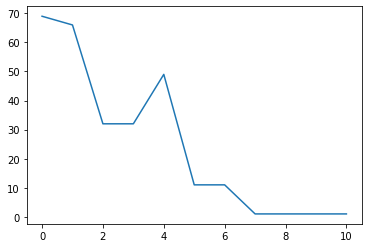

In [8]:
population,fitness_list,solution = train(10)
plt.plot(fitness_list)
plt.show()

# Now let's print the solution

In [9]:
print(solution)

[9 1 2 3]
